# Build a 3D model
## Load dataset, prepare the geo_data and visualize data
Kristiaan JOSEPH and Olivier KAUFMANN, 2020

In [1]:
%run ./prepare_model.ipynb

Active grids: ['regular']
[ 20 95 30 85 10 50 ]
Active grids: ['regular' 'topography']
Active grids: ['regular' 'topography']


In [2]:
geo_data.set_active_grid('topography')

Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   1.        ,   3.        ],
       [  1.        ,   1.        ,   5.        ],
       ...,
       [100.        ,  95.91836735,  30.2       ],
       [100.        ,  97.95918367,  30.2       ],
       [100.        , 100.        ,  30.2       ]])

### Compute the 3D model

In [3]:
gp.set_interpolator(geo_data, theano_optimizer='fast_compile', verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range            153.622915
$C_o$            561.904762
drift equations      [3, 3]


In [4]:
gp.get_data(geo_data, 'kriging')

,values
range,153.622915
$C_o$,561.904762
drift equations,"[3, 3]"


In [5]:
geo_data.additional_data.structure_data

,values
isLith,True
isFault,False
number faults,0
number surfaces,3
number series,2
number surfaces per series,"[3, 0]"
len surfaces surface_points,"[3, 3, 2]"
len series surface_points,"[8, 0]"
len series orientations,"[3, 0]"


In [6]:
sol = gp.compute_model(geo_data, compute_mesh=True, sort_surfaces=False)

In [7]:
ver, sim = gp.get_surfaces(geo_data)

In [8]:
gp.plot.plot_3d(geo_data)

/home/su530201/.local/share/virtualenvs/3d_geology-FCMUXYEf/lib/python3.8/site-packages/pyvista/plotting/plotting.py:1795: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


/home/su530201/.local/share/virtualenvs/3d_geology-FCMUXYEf/lib/python3.8/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


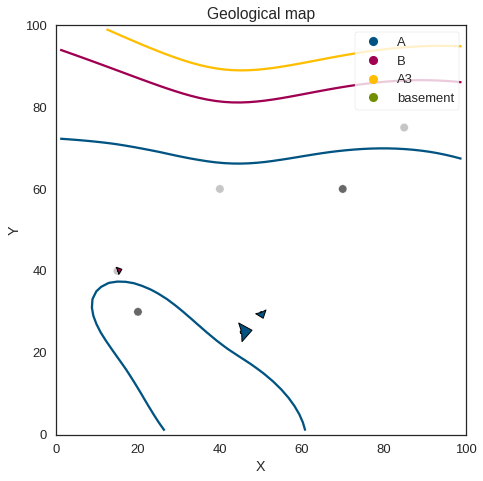

In [9]:
gp.plot_2d(geo_data, section_names=['topography'], show_lith=False, show_boundaries=True)
#plt.show()

In [10]:
# gp.plot.plot_3d(geo_data, show_topography=True, show_surfaces=True, show_lith=True)

In [11]:
from gempy.core.grid_modules import section_utils

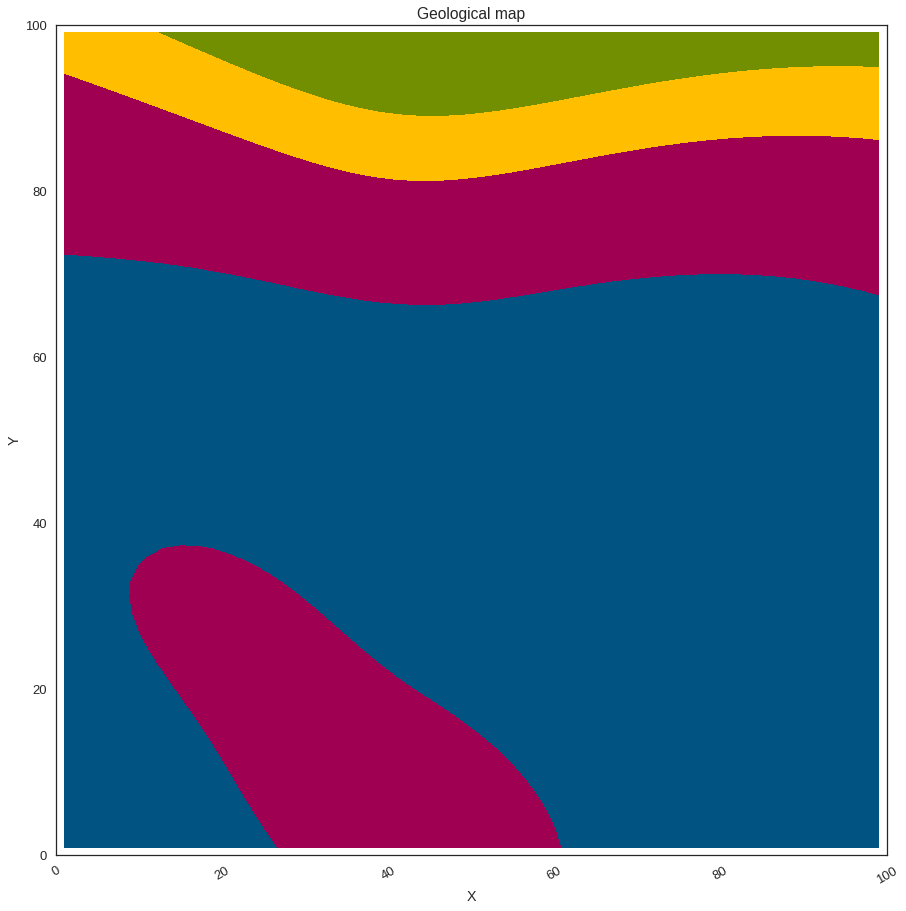

In [12]:
polygondict, cdict, extent = section_utils.get_polygon_dictionary(geo_data, 'topography')

In [13]:
geo_data.save_model('model', './', compress=True)

True

In [14]:
extent

[0.0, 100.0, 0.0, 100.0]

### Custom section plotting from polydict, cdict and extent returned by section_utils.get_polygon_dictionary

plotting basement...
plotting A3...
plotting B...
plotting A...


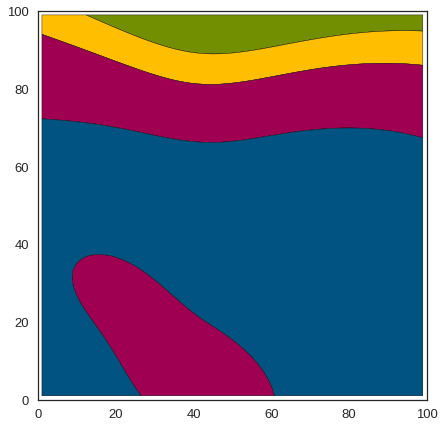

In [15]:
from matplotlib.patches import PathPatch

fig, ax = plt.subplots()
for k in polygondict.keys():
    print(f'plotting {k}...')
    paths  = polygondict[k]
    for p in paths:
        polygon_patch = PathPatch(p, facecolor=cdict[k],
                          edgecolor=(0.0, 0.0, 0.0))
        ax.add_patch(polygon_patch)
ax.set_xlim([extent[0], extent[1]])
ax.set_ylim([extent[2], extent[3]])
ax.set_aspect(1.)

/home/su530201/.local/share/virtualenvs/3d_geology-FCMUXYEf/lib/python3.8/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


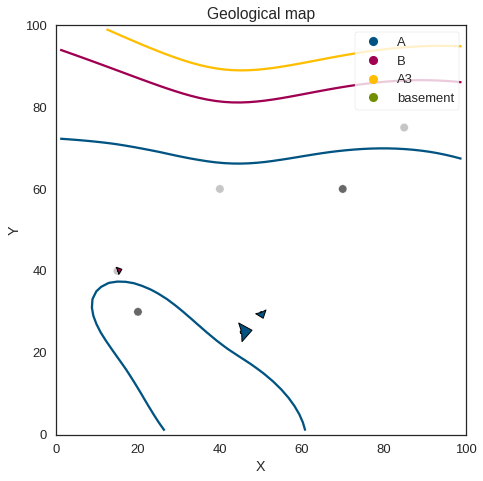

In [16]:
gp.plot_2d(geo_data, section_names=['topography'], show_lith=False, show_boundaries=True, )